# 📱 Mobile Phone Price Prediction Project
This notebook predicts the price range (low/medium/high/very high) of mobile phones based on specifications using machine learning.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
# Load dataset
df = pd.read_csv("/Users/vishwanathreddy/Downloads/unified mentor /MobilePricePredictionProject/dataset.csv")  # Make sure this file is in your folder
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## 🔍 Exploratory Data Analysis

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

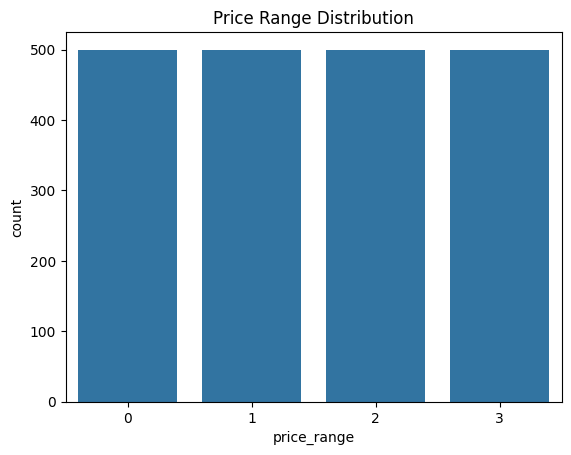

In [5]:

sns.countplot(data=df, x='price_range')
plt.title("Price Range Distribution")
plt.show()


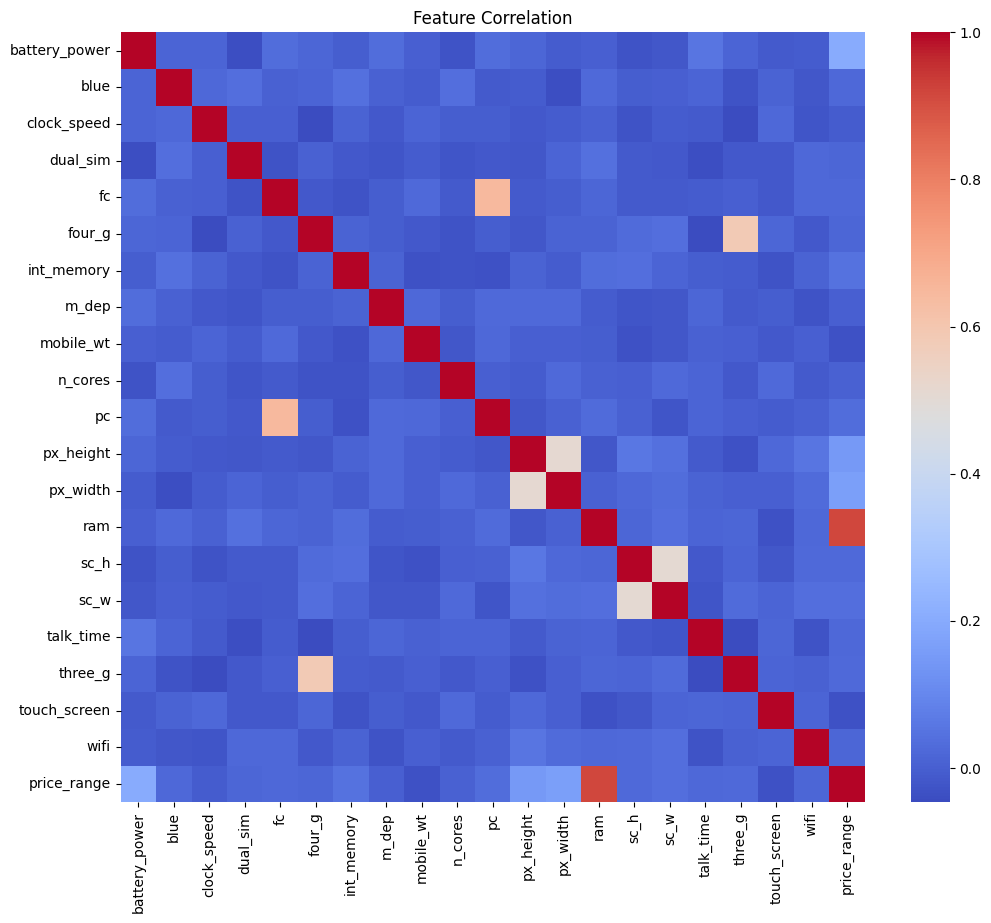

In [6]:

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


## 🧹 Data Preprocessing

In [8]:

X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 🧠 Model Training with Random Forest

In [14]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


## 📊 Model Evaluation

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



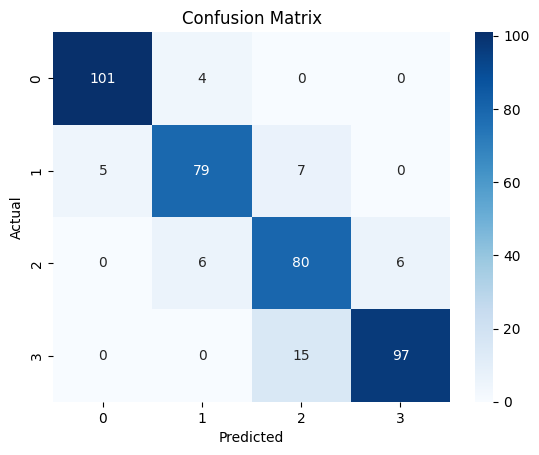

In [15]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 🔍 Feature Importance

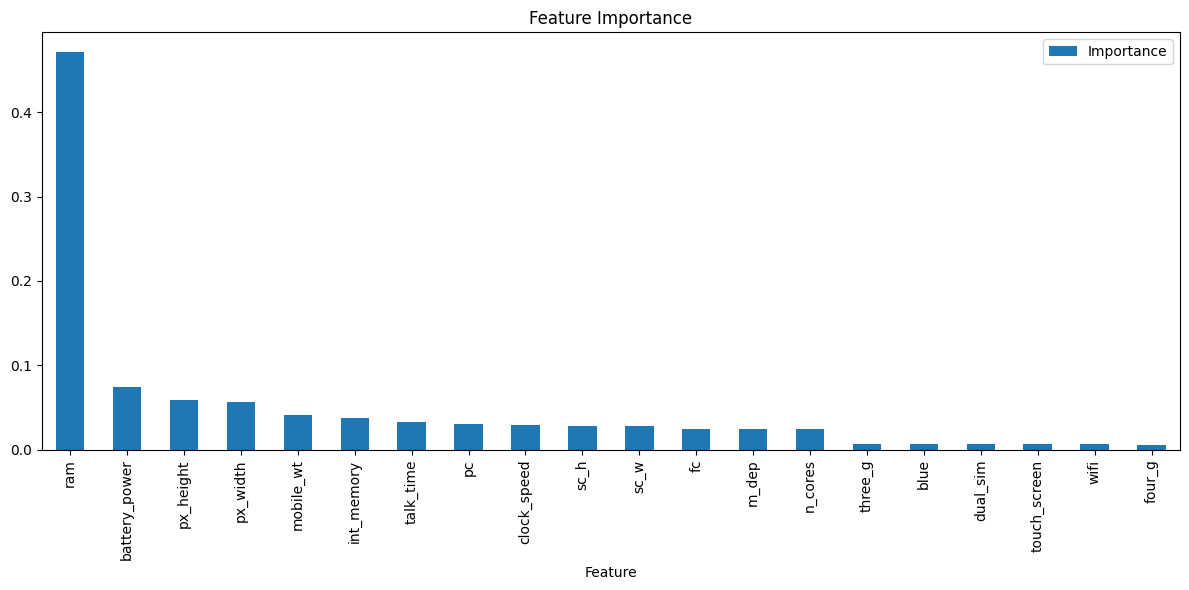

In [16]:

importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False).plot(kind='bar', x='Feature', figsize=(12,6))
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


## 🧪 Predict New Mobile Data

In [17]:

new_sample = pd.DataFrame([[750, 1, 2.0, 1, 3, 1, 32, 0.5, 140, 4, 12, 8, 1500, 12, 6, 10, 1, 1, 1]],
                          columns=X.columns)
new_sample_scaled = scaler.transform(new_sample)
model.predict(new_sample_scaled)


ValueError: 20 columns passed, passed data had 19 columns

In [18]:
len(X.columns)


20

In [19]:
# Check column names
print(X.columns.tolist())


['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


In [20]:
['battery_power', 'blue', 'clock_speed', 'dual_sim', ..., 'wifi']  # 19 columns


['battery_power', 'blue', 'clock_speed', 'dual_sim', Ellipsis, 'wifi']

In [23]:
new_sample = pd.DataFrame([[
    750,        # battery_power
    1,          # blue
    2.0,        # clock_speed
    1,          # dual_sim
    3,          # fc
    1,          # four_g
    32,         # int_memory
    0.5,        # m_dep
    140,        # mobile_wt
    4,          # n_cores
    12,         # pc
    8,          # px_height
    1500,       # px_width
    1200,       # ram
    12,         # sc_h
    6,          # sc_w
    10,         # talk_time
    1,          # three_g
    1,          # touch_screen
    1           # wifi
]], columns=X.columns)

new_sample_scaled = scaler.transform(new_sample)
model.predict(new_sample_scaled)


array([0])

In [28]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load model and scaler (You must have these files saved during training)
@st.cache_resource
def load_model():
    model = joblib.load("model.pkl")
    scaler = joblib.load("scaler.pkl")
    return model, scaler

model, scaler = load_model()

st.title("📱 Mobile Price Range Predictor")
st.write("Enter mobile specifications to predict its price range:")

# User input features
battery_power = st.slider("Battery Power (mAh)", 500, 2000, 1000)
blue = st.selectbox("Bluetooth", [0, 1])
clock_speed = st.slider("Clock Speed (GHz)", 0.5, 3.0, 1.5)
dual_sim = st.selectbox("Dual SIM", [0, 1])
fc = st.slider("Front Camera (MP)", 0, 20, 5)
four_g = st.selectbox("4G Support", [0, 1])
int_memory = st.slider("Internal Memory (GB)", 2, 64, 16)
m_dep = st.slider("Mobile Depth (cm)", 0.1, 1.0, 0.5)
mobile_wt = st.slider("Mobile Weight (g)", 80, 250, 150)
n_cores = st.slider("Number of Cores", 1, 8, 4)
pc = st.slider("Primary Camera (MP)", 0, 20, 12)
px_height = st.slider("Pixel Height", 0, 1960, 800)
px_width = st.slider("Pixel Width", 500, 2000, 1000)
ram = st.slider("RAM (MB)", 256, 4000, 2048)
sc_h = st.slider("Screen Height (cm)", 5, 20, 12)
sc_w = st.slider("Screen Width (cm)", 0, 20, 7)
talk_time = st.slider("Talk Time (hrs)", 2, 20, 10)
three_g = st.selectbox("3G Support", [0, 1])
touch_screen = st.selectbox("Touch Screen", [0, 1])
wifi = st.selectbox("WiFi Support", [0, 1])

# Prediction
if st.button("Predict Price Range"):
    features = np.array([[battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep,
                          mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w,
                          talk_time, three_g, touch_screen, wifi]])

    scaled_features = scaler.transform(features)
    prediction = model.predict(scaled_features)[0]
    probas = model.predict_proba(scaled_features)[0]

    label_map = ["Low Cost", "Medium Cost", "High Cost", "Very High Cost"]
    st.success(f"Predicted Price Range: **{label_map[prediction]}**")

    st.subheader("Prediction Confidence")
    for i, p in enumerate(probas):
        st.write(f"{label_map[i]}: {p*100:.2f}%")

import joblib
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")



2025-05-20 21:17:18.011 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 21:17:18.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 21:17:18.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 21:17:18.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 21:17:18.015 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 21:17:18.015 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 21:17:18.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 21:17:18.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

['scaler.pkl']

In [26]:
import joblib

# Assuming `model` is your trained classifier and `scaler` is your StandardScaler
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']